## IMPORTS

In [1]:
import pandas as pd
import sys
from matplotlib import pyplot as plt


sys.path.append('../../')
from utils import clustering_utils, bokeh_ui_utils

In [2]:
full_filtered_df = pd.read_csv('../../new_raw_data/rna_seq_processed/kallisto.csv')
# full_filtered_df = full_filtered_df.rename(columns={'Unnamed: 0': 'TTHERM_ID'})
# full_filtered_norm_df = microarray_utils.normalize_expression_per_gene(full_filtered_df)

num_genes = full_filtered_df.shape[0]
num_genes

20646

In [3]:
full_filtered_df.sample(10)

,TTHERM_ID,000min,030min,060min,090min,120min,150min,180min,210min,240min
15719,YF00025056.t1,0.992940,1.000000,0.728544,0.445318,0.310175,0.731130,0.137278,0.077702,0.000000
13247,YF00021202.t1,0.000000,0.726876,0.531605,1.000000,0.962710,0.761669,0.446559,0.421028,0.273383
16861,YF00026982.t1,0.437915,0.422867,0.949643,0.978221,0.855760,1.000000,0.576688,0.262898,0.000000
18427,YF00031454.t1,0.953148,1.000000,0.516643,0.509269,0.341238,0.528134,0.000000,0.045430,0.244370
6537,YF00010175.t1,0.464829,0.209514,0.142442,0.000000,0.283618,1.000000,0.678518,0.899962,0.567591
12917,YF00020751.t1,0.336735,0.767643,0.224510,0.000000,0.622677,1.000000,0.740609,0.915078,0.786666
1157,YF00001624.t1,0.438055,0.000000,0.443615,0.269742,0.547203,1.000000,0.193139,0.424050,0.603378
13105,YF00021002.t1,0.505537,0.000000,0.109144,0.566672,0.877547,1.000000,0.868132,0.913284,0.873530
14680,YF00023644.t1,0.804038,0.434900,0.476553,1.000000,0.081879,0.874716,0.373315,0.511035,0.000000
2825,YF00004390.t1,0.454818,0.024409,0.019822,0.324102,0.000000,0.162129,0.868087,1.000000,0.588300


### LEIDEN CLUSTERING

In [4]:
phases = 'rna_seq'

In [5]:
leiden_label_df_round_1, partition_stats, cluster_sizes, enriched_cluster_sizes =  clustering_utils.build_label_df(
    full_filtered_df, 
    metric='cosine', 
    n_neighbors=3, 
    resolution_param=0.035, 
    partition_type = 'EXP', 
    n_jobs = -1, 
    random_state=42
    )

In [6]:
leiden_label_df_round_1_arranged = bokeh_ui_utils.arrange_modules(full_filtered_df, leiden_label_df_round_1, phases) 
leiden_label_df_round_1_arranged_sorted = leiden_label_df_round_1_arranged.sort_values(by=['label', 'TTHERM_ID'], ascending=False)
leiden_label_df_round_1_arranged_sorted.to_csv('./test_nn3_leiden_label_df_round_1.csv', index=False)

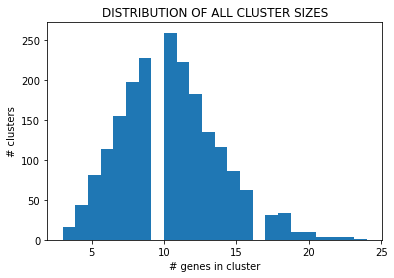

In [7]:
plt.hist(cluster_sizes, max(cluster_sizes))
plt.title('DISTRIBUTION OF ALL CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

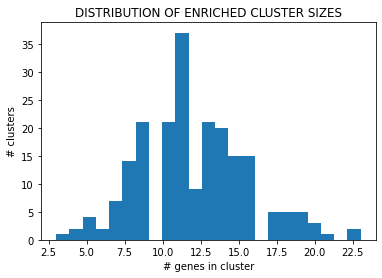

In [8]:
plt.hist(enriched_cluster_sizes, max(enriched_cluster_sizes))
plt.title('DISTRIBUTION OF ENRICHED CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

In [9]:
key_lens = [len(k) for k in partition_stats.keys()]
max_key_len = max(key_lens)

for k, v in partition_stats.items():
    print(f'{" " * (max_key_len - len(k))}{k}:', v)

              partition_type: EXP
              dimensionality: baseline
                      metric: cosine
                       graph: umap_fuzzy_simplicial_set
                         nns: 3
                  clustering: leiden_cpm
                   parameter: 0.035
            silhouette_score: -0.04231993851414939
                  modularity: 0.750778221505107
                   nclusters: 1990
           mean_cluster_size: 10.374874371859297
         median_cluster_size: 10.0
             sd_cluster_size: 3.4599171947125877
          nenriched_clusters: 210
  mean_enriched_cluster_size: 12.061904761904762
median_enriched_cluster_size: 11.0
    sd_enriched_cluster_size: 3.6030378968542367
     nenriched_cluster_genes: 2533
                    datetime: 2024-03-29 16:34:12.829902
